In [2]:
%reload_ext autoreload
%autoreload 2

In [1]:
from nzdownscale.downscaler.validate_v2 import ValidateV2
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
model_name = 'hourly_v2'
var = 'temperature'

model_dir = f'/home/emily/deepsensor/deepweather-downscaling/experiments/'\
            f'models/{var}/{model_name}'
model_path = f'{model_dir}/{model_name}.pt'
train_metadata_path = f'{model_dir}/metadata_{model_name}.pkl'
data_processor_path = f'{model_dir}/data_processor.pkl'
task_loader_path = f'{model_dir}/task_loader.pkl'

In [29]:
validate = ValidateV2(model_path,
                      data_processor_path,
                      task_loader_path,
                      train_metadata_path)

Producing predictions at resolution: 0.01


In [62]:
# time = [datetime(2010, 1, 1, i) for i in range(24)]
# once the other notebook has finished loading val_tasks, check what dates the val_tasks are. 
# every 10 hours? 

date_range = pd.date_range(start=datetime(2016, 1, 1, 0), end=datetime(2016, 2, 1, 0), freq='H')
time = date_range[:24]
time = [date.to_pydatetime() for date in time]

remove_stations_list = [
    "TAUPO AWS",
    "CHRISTCHURCH AERO",
    "KAITAIA AERO",
    "MT COOK EWS",
    "AUCKLAND AERO",
    "ALEXANDRA AWS",
    "TOLAGA BAY WXT AWS",
    "WELLINGTON AERO",
    "BLENHEIM AERO",
    "DUNEDIN AERO AWS",
]

In [63]:
pred = validate.predict(time, remove_stations=remove_stations_list)

Loading ERA5:   0%|          | 0/6 [00:00<?, ?it/s]

Loading stations: 100%|██████████| 444/444 [01:25<00:00,  5.18it/s]


184 stations with data at prediction time(s)
Removing TAUPO AWS
Removing CHRISTCHURCH AERO
Removing KAITAIA AERO
Removing MT COOK EWS
Removing AUCKLAND AERO
Removing ALEXANDRA AWS
Removing TOLAGA BAY WXT AWS
Removing WELLINGTON AERO
Removing BLENHEIM AERO
Removing DUNEDIN AERO AWS
Removed 10 stations
Pre-processing ERA5 data
Pre-processing station data


100%|██████████| 24/24 [00:29<00:00,  1.21s/it]


In [57]:
# pred['dry_bulb']['mean'].to_netcdf(f'{model_dir}/pred_20100101.nc')

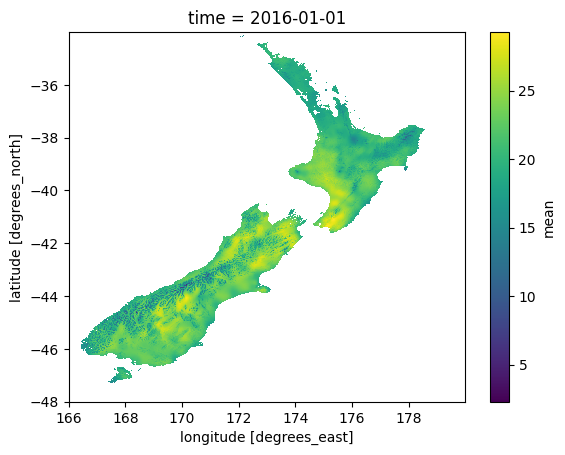

In [53]:
for i in range(1):
    fig, ax = plt.subplots()
    ds = pred['dry_bulb']['mean']
    ds.isel(time=i).plot(ax=ax, 
                         vmax=ds.max(skipna=True), 
                         vmin=ds.min(skipna=True))

In [57]:
import xarray as xr

(138.5, -0.5)

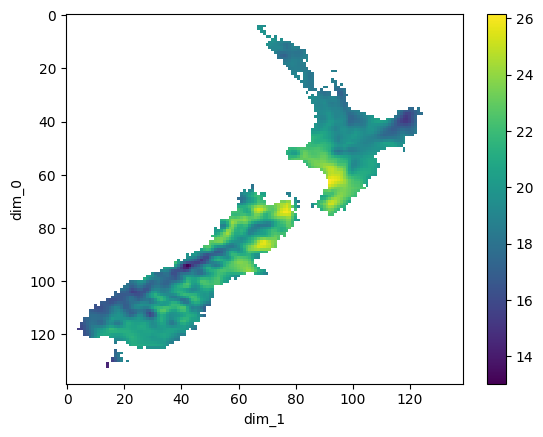

In [61]:
task = validate.task_loader(time)
task_era5 = task[0]['Y_c'][0][0]
denorm_params = validate.data_processor.config['t2m']['params']
task_era5 = (task_era5 * denorm_params['std']) + denorm_params['mean']
# era5_ds = ds.copy()
era5_ds = xr.DataArray(task_era5 - 273.15)
era5_ds.plot()
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1]) 